# Modelo de Regresión Logística

La regresión de tipo logaritmica, permite pronosticar a las variables categóricas.
Las variables categóricas son variables que cuentan con un número finito de valores, generalmente asociado a una característica caulitativa, como por ejemplo el sexo Hombre o Mujer, la cual se puede transformar a 1 si es Hombre y
0 si es mujer.

In [ ]:
library(ggplot2)
library(prob)
library(tidyverse)
library(dplyr)

In [2]:
getwd()

[1] "/datos/practica-final-verano-2021-Juanes8"

In [3]:
datos <- read.csv(file='/datos/practica-final-verano-2021-Juanes8/Datos_pf.csv')

In [5]:
colnames(datos)

[1] "Salario"     "edad"        "escolaridad" "empleo"      "genero"     
 [6] "Escolaridad" "Empleo"      "Genero"      "X"           "X.1"        
[11] "X.2"         "X.3"         "X.4"         "Superior"

In [6]:
datos<-datos%>%select(Salario,edad,escolaridad,empleo,genero,Escolaridad,Empleo,Genero)

In [7]:
print(head(datos))

  Salario edad escolaridad          empleo genero Escolaridad Empleo Genero
1   12000   57      Basica  Tiempo Parcial      M           0      0      0
2   22400   48    Superior Tiempo Completo      M           1      1      0
3   13200   38      Basica  Tiempo Parcial      M           0      0      0
4    7500   27    Superior  Tiempo Parcial      M           1      0      0
5   11100   23    Superior  Tiempo Parcial      H           1      0      1
6   12700   22    Superior  Tiempo Parcial      M           1      0      0


In [9]:
informacion <- ggplot()

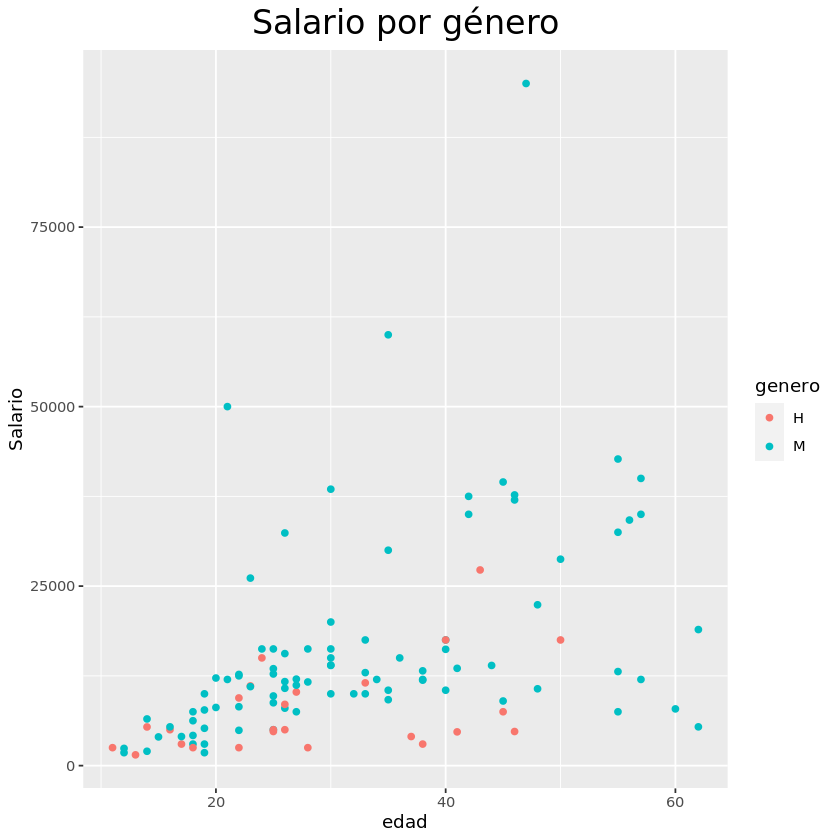

In [10]:
informacion + geom_point(datos, mapping = aes (x=edad, y=Salario, color=genero)) +
ggtitle ('Salario por género') + theme(plot.title =element_text (size=20, hjust=0.5))

In [41]:
datos<-datos%>%select(Salario,edad,Escolaridad,Empleo,Genero)
logit<-glm(Genero~Salario,data=datos,family = "binomial")
summary(logit)


Call:
glm(formula = Genero ~ Salario, family = "binomial", data = datos)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.13075  -0.72735  -0.57395  -0.09391   2.64775  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.272e-01  4.577e-01   0.278  0.78115   
Salario     -1.322e-04  4.603e-05  -2.872  0.00408 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 119.93  on 113  degrees of freedom
Residual deviance: 104.64  on 112  degrees of freedom
AIC: 108.64

Number of Fisher Scoring iterations: 6


## Para realizar las predicciones

In [42]:
predicciones <- data.frame(predict(logit, datos, type='response'))

In [51]:
predicciones <- ifelse(predicciones > 0.5, 'H', 'M')

In [52]:
datos <-datos %>% mutate(Predicion_modelo=predicciones)

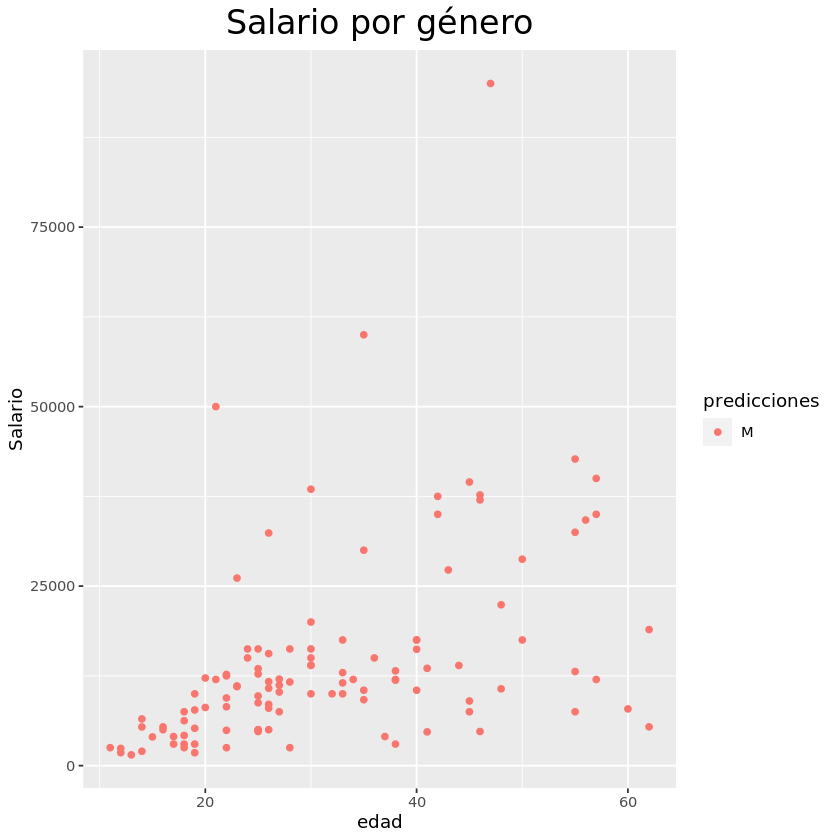

In [55]:
informacion + geom_point(datos, mapping = aes (x=edad, y=Salario, color=predicciones)) +
ggtitle ('Salario por género') + theme(plot.title =element_text (size=20, hjust=0.5))